In [ ]:
'''
First Full model for neural network.
Need to do more preprocessing, maybe use ensemble techs?
  Average MSE: 1762373241.38
  Average RMSE: 40877.9508149
  Average Sale Price: $180615.06
  Average RMSE: $40877.95
  RMSE as Percentage of Average Sale Price: 22.63%
  Baseline RMSE: $79258.23
  Model RMSE is better than baseline.
  Logarithmic RMSE: 3.0168102385336213

2nd: enoded additional categorical 
  MSE scores for each fold: [  1.05978198e+09   1.48816898e+09   1.65048210e+09   3.81049748e+09
    1.25836784e+09]
  RMSE scores for each fold: [ 32554.29274558  38576.79329149  40626.12589008  61729.22710779
    35473.48081063]
  Average MSE: 1853459676.36
  Average RMSE: 41791.9839691
  Average Sale Price: $180615.06
  Average RMSE: $41791.98
  RMSE as Percentage of Average Sale Price: 23.14%
  Baseline RMSE: $79258.23
  Model RMSE is better than baseline.
  Logarithmic RMSE: 2.4033767712078378

  
3rd: added 0s for missing values instead of dropping and used MinMaxScaler()
Logarithmic RMSE: 0.5253631751233521

'''

In [138]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def load_and_initial_clean(filepath):
    """ Load the dataset and drop irrelevant columns. """
    data = pd.read_csv(filepath)
    data.drop('Id', axis=1, inplace=True)
    return data

def handle_missing_values(data):
    """ Fill and predict missing numerical values and drop rows for specific cases. """
    # Handle 'LotArea' missing values
    data['LotArea'].fillna(data['LotArea'].median(), inplace=True)
    
    # Predict missing 'LotFrontage' using Linear Regression
    if data['LotFrontage'].isnull().any():
        non_na_data = data.dropna(subset=['LotFrontage'])
        model = LinearRegression()
        model.fit(non_na_data[['LotArea']], non_na_data['LotFrontage'])
        missing_indices = data['LotFrontage'].isnull()
        data.loc[missing_indices, 'LotFrontage'] = model.predict(data.loc[missing_indices, ['LotArea']])
    
    # Drop rows where 'MasVnrArea' is NA
    # data.dropna(subset=['MasVnrArea'], inplace=True)
    data['MasVnrArea'].fillna(0, inplace=True) #using 0 instead

    # Fill 'GarageYrBlt' NAs indicating no garage
    data['GarageYrBlt'].fillna(0, inplace=True)
    data['HasGarage'] = data['GarageYrBlt'].apply(lambda x: 1 if x > 0 else 0)
  

def get_season(month):
    """ Convert month number to season name. """
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

def feature_engineering(data):
    """Add new features and handle categorical variables."""
    # Numerical features
    data['TotalSF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']
    data['HouseAge'] = data['YrSold'] - data['YearBuilt']
    data['RemodelAge'] = data['YrSold'] - data['YearRemodAdd']
    data['HasBasement'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    data['TotalBath'] = data['FullBath'] + 0.5 * data['HalfBath'] + data['BsmtFullBath'] + 0.5 * data['BsmtHalfBath']
    data['OverallScore'] = data['OverallQual'] + data['OverallCond']
    data['LotFrontageRatio'] = data['LotFrontage'] / data['LotArea']
    data['SaleSeason'] = data['MoSold'].apply(get_season)
    # Price per SF: no column in test
    # data['PricePerSF'] = data['SalePrice'] / data['TotalSF']


    # Categorical features - One Hot Encoding
    categorical_cols = [
        'MSSubClass', 'Alley', 'MSZoning', 'Street', 'LotShape',
        'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'Foundation', 'Heating', 'CentralAir',
        'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
        'MiscFeature', 'SaleType', 'SaleCondition', 'SaleSeason',
        'MasVnrType', 'Electrical', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
        'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC',
        'Fence'
        ]
    data = pd.get_dummies(data, columns=categorical_cols, dummy_na=True)
    return data


def missing(data):
    #missing NA features. i.e one hot encoded features that have no NA, are not here
    missing_features = [
    'MSSubClass_150.0']

    # Add each missing feature to the test set with all values set to 0
    for feature in missing_features:
        data[feature] = 0


def save_preprocessed_data(data, output_file_path):
    """ Save the preprocessed data to a CSV file. """
    data.to_csv(output_file_path, index=False)

# Main function to orchestrate the preprocessing
def main():
    file_path = 'train.csv'
    output_file_path = 'train_with_features_Gus.csv'
    
    data = load_and_initial_clean(file_path)
    handle_missing_values(data)
    data = feature_engineering(data)
    missing(data)
    save_preprocessed_data(data, output_file_path)

if __name__ == "__main__":
    main()


In [139]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def load_and_initial_clean(filepath):
    """ Load the dataset and drop irrelevant columns. """
    data = pd.read_csv(filepath)
    #data.drop('Id', axis=1, inplace=True) #handled in modeling
    return data

def handle_missing_values(data):
    """ Fill and predict missing numerical values and drop rows for specific cases. """
    # Handle 'LotArea' missing values
    data['LotArea'].fillna(data['LotArea'].median(), inplace=True)
    
    # Predict missing 'LotFrontage' using Linear Regression
    if data['LotFrontage'].isnull().any():
        non_na_data = data.dropna(subset=['LotFrontage'])
        model = LinearRegression()
        model.fit(non_na_data[['LotArea']], non_na_data['LotFrontage'])
        missing_indices = data['LotFrontage'].isnull()
        data.loc[missing_indices, 'LotFrontage'] = model.predict(data.loc[missing_indices, ['LotArea']])
    
    # Drop rows where 'MasVnrArea' is NA
    # data.dropna(subset=['MasVnrArea'], inplace=True) #setting to 0 to test
    
    # Fill 'GarageYrBlt' NAs indicating no garage
    data['GarageYrBlt'].fillna(0, inplace=True)
    data['HasGarage'] = data['GarageYrBlt'].apply(lambda x: 1 if x > 0 else 0)
    ##########################################################################
    # Alternatively, you can handle multiple columns at once
    columns_to_fill = ['TotalBsmtSF', 'BsmtFullBath', 'GarageCars', 'GarageArea',
                       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtHalfBath', 'MasVnrArea']
    data[columns_to_fill] = data[columns_to_fill].fillna(0)


def get_season(month):
    """ Convert month number to season name. """
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

def feature_engineering(data):
    """Add new features and handle categorical variables."""
    # Numerical features
    data['TotalSF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']
    data['HouseAge'] = data['YrSold'] - data['YearBuilt']
    data['RemodelAge'] = data['YrSold'] - data['YearRemodAdd']
    data['HasBasement'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    data['TotalBath'] = data['FullBath'] + 0.5 * data['HalfBath'] + data['BsmtFullBath'] + 0.5 * data['BsmtHalfBath']
    data['OverallScore'] = data['OverallQual'] + data['OverallCond']
    data['LotFrontageRatio'] = data['LotFrontage'] / data['LotArea']
    data['SaleSeason'] = data['MoSold'].apply(get_season)

    # Categorical features - One Hot Encoding
    categorical_cols = [
        #'MSSubClass', 
        'MSSubClass', 'Alley', 'MSZoning', 'Street', 'LotShape',
        'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'Foundation', 'Heating', 'CentralAir',
        'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
        'MiscFeature', 'SaleType', 'SaleCondition', 'SaleSeason',
        'MasVnrType', 'Electrical', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
        'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC',
        'Fence'
        ]
    data = pd.get_dummies(data, columns=categorical_cols, dummy_na=True)
    return data


def missing(data):
    #missing NA features. i.e one hot encoded features that have no NA, are not here
    missing_features = [
    'PoolQC_Fa', 'Condition2_RRAe', 'Heating_OthW', 'RoofMatl_Metal', 
    'Condition2_RRAn', 'RoofMatl_Roll', 'Electrical_Mix', 'HouseStyle_2.5Fin', 
    'Heating_Floor', 'RoofMatl_Membran', 'Condition2_RRNn', 'MiscFeature_TenC', 
    'Exterior2nd_Other', 'Exterior1st_Stone', 'Utilities_NoSeWa', 'RoofMatl_ClyTile', 
    'GarageQual_Ex', 'Exterior1st_ImStucc']

    # Add each missing feature to the test set with all values set to 0
    for feature in missing_features:
        data[feature] = 0


def save_preprocessed_data(data, output_file_path):
    """ Save the preprocessed data to a CSV file. """
    data.to_csv(output_file_path, index=False)

# Main function to orchestrate the preprocessing
def main():
    file_path = 'test.csv'
    output_file_path = 'test_with_features_Gus.csv'
    
    data = load_and_initial_clean(file_path)
    handle_missing_values(data)
    data = feature_engineering(data)
    missing(data)
    save_preprocessed_data(data, output_file_path)

if __name__ == "__main__":
    main()


In [140]:
import pandas as pd

# Load your data (Assuming it's already been preprocessed and one-hot encoded)
train_data = pd.read_csv('train_with_features_Gus.csv')
test_data = pd.read_csv('test_with_features_Gus.csv')

# Get the list of columns for both datasets
train_cols = set(train_data.columns)
test_cols = set(test_data.columns)

# Find columns that don't match
missing_in_test = train_cols - test_cols
missing_in_train = test_cols - train_cols

print("Columns in train not in test:", missing_in_test)
print("Columns in test not in train:", missing_in_train)

# Count NaN values per column
nan_counts = data.isnull().sum()

# Print columns with NaN values only
print("NaN Values Per Column (Only columns with NaNs):")
for column, count in nan_counts.iteritems():
    if count > 0:  # Check if the count of NaNs is greater than zero
        print(f"{column}: {count} NaN values")

Columns in train not in test: {'SalePrice'}
Columns in test not in train: {'Id'}


In [156]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import warnings
# Load the data
data = pd.read_csv('train_with_features_Gus.csv')
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Define a scaler and MLP regressor in a pipeline
# This ensures that scaling is correctly reapplied for each cross-validation fold
pipeline = make_pipeline(MinMaxScaler(), MLPRegressor(
    hidden_layer_sizes=(128, 64, 50),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42
))

# Set up K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate MSE across all folds
mse_scores = -cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)  # Convert MSE to RMSE

print("MSE scores for each fold:", mse_scores)
print("RMSE scores for each fold:", rmse_scores)
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.mean(rmse_scores))


average_price = y.mean()
rmse_percentage = (rmse_scores.mean() / average_price) * 100
print(f"Average Sale Price: ${average_price:.2f}")
print(f"Average RMSE: ${rmse_scores.mean():.2f}")
print(f"RMSE as Percentage of Average Sale Price: {rmse_percentage:.2f}%")

# Compare with baseline RMSE
baseline_rmse = np.sqrt(mean_squared_error(y, [y.mean()] * len(y)))
print(f"Baseline RMSE: ${baseline_rmse:.2f}")
if rmse_scores.mean() < baseline_rmse:
    print("Model RMSE is better than baseline.")
else:
    print("Model RMSE is not better than baseline.")

#######################################################################################
# Testing: Load the preprocessed test data
test_data = pd.read_csv('test_with_features_Gus.csv')

# Assuming the first column is 'Id' and the rest are features used for prediction
X_test = test_data.drop('Id', axis=1)  # Drop 'Id' for prediction purposes

# Fit the pipeline to the full training data
pipeline.fit(X, y)

# Predict on the test data
y_test_pred = pipeline.predict(X_test)

# Create a DataFrame for submission that includes the Id and the predicted prices
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': y_test_pred
})

# Save the submission file
submission.to_csv('predictions.csv', index=False)

#######################################################################################
# Load the predictions and actual values
predictions_df = pd.read_csv('predictions.csv')
actual_df = pd.read_csv('sample_submission.csv')

# Sort both DataFrames by 'Id' to ensure alignment
predictions_df.sort_values('Id', inplace=True)
actual_df.sort_values('Id', inplace=True)

# Find mismatched IDs
predictions_ids = set(predictions_df['Id'])
actual_ids = set(actual_df['Id'])
mismatched_ids = actual_ids - predictions_ids

# Warn if there are mismatches and adjust the actual values DataFrame
if mismatched_ids:
    warnings.warn(f"Mismatched IDs found: {mismatched_ids}. These will be removed from the actuals.")
    actual_df = actual_df[actual_df['Id'].isin(predictions_ids)]

# Ensure the adjusted DataFrames are aligned correctly
actual_df.sort_values('Id', inplace=True)  # Re-sort to ensure order after adjustments


# Calculate the logarithm of predictions and actual values to prevent scale bias
log_predictions = np.log(predictions_df['SalePrice'] + 1)
log_actual = np.log(actual_df['SalePrice'] + 1)

# Calculate RMSE using the log-transformed values
mse = mean_squared_error(log_actual, log_predictions)
rmse = np.sqrt(mse)

print(f'Logarithmic RMSE: {rmse}')


MSE scores for each fold: [  1.03509743e+09   1.11971635e+09   3.77621560e+09   9.78745738e+08
   6.16715773e+08]
RMSE scores for each fold: [ 32172.9301224   33462.16289029  61450.92029345  31284.91229929
  24833.76276855]
Average MSE: 1505298178.74
Average RMSE: 36640.9376748
Average Sale Price: $180921.20
Average RMSE: $36640.94
RMSE as Percentage of Average Sale Price: 20.25%
Baseline RMSE: $79415.29
Model RMSE is better than baseline.
Logarithmic RMSE: 0.5253631751233521


In [155]:
#######################################################################################
# Testing: Load the preprocessed test data
test_data = pd.read_csv('test_with_features_Gus.csv')

# Assuming the first column is 'Id' and the rest are features used for prediction
X_test = test_data.drop('Id', axis=1)  # Drop 'Id' for prediction purposes

# Fit the pipeline to the full training data
pipeline.fit(X, y)

# Predict on the test data
y_test_pred = pipeline.predict(X_test)

# Create a DataFrame for submission that includes the Id and the predicted prices
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': y_test_pred
})

# Save the submission file
submission.to_csv('predictions.csv', index=False)

#######################################################################################
# Load the predictions and actual values
predictions_df = pd.read_csv('predictions.csv')
actual_df = pd.read_csv('sample_submission.csv')

# Sort both DataFrames by 'Id' to ensure alignment
predictions_df.sort_values('Id', inplace=True)
actual_df.sort_values('Id', inplace=True)

# Find mismatched IDs
predictions_ids = set(predictions_df['Id'])
actual_ids = set(actual_df['Id'])
mismatched_ids = actual_ids - predictions_ids

# Warn if there are mismatches and adjust the actual values DataFrame
if mismatched_ids:
    warnings.warn(f"Mismatched IDs found: {mismatched_ids}. These will be removed from the actuals.")
    actual_df = actual_df[actual_df['Id'].isin(predictions_ids)]

# Ensure the adjusted DataFrames are aligned correctly
actual_df.sort_values('Id', inplace=True)  # Re-sort to ensure order after adjustments


# Calculate the logarithm of predictions and actual values to prevent scale bias
log_predictions = np.log(predictions_df['SalePrice'] + 1)
log_actual = np.log(actual_df['SalePrice'] + 1)

# Calculate RMSE using the log-transformed values
mse = mean_squared_error(log_actual, log_predictions)
rmse = np.sqrt(mse)

print(f'Logarithmic RMSE: {rmse}')


Logarithmic RMSE: 0.5253631751233521


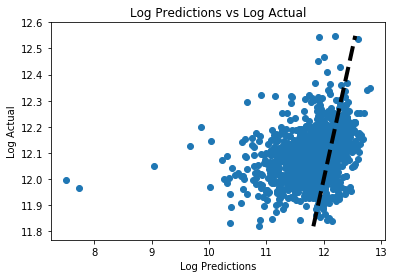

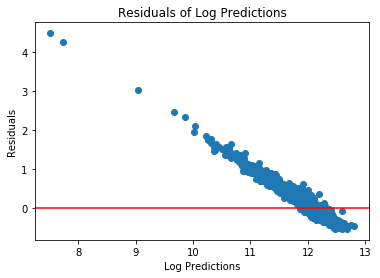

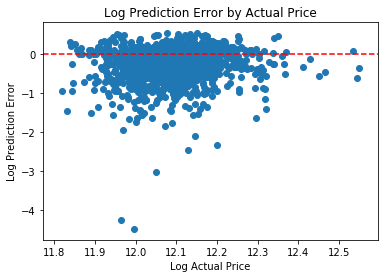

Re-calculated Logarithmic RMSE: 0.5253631751233521


In [151]:
import matplotlib.pyplot as plt

plt.scatter(log_predictions, log_actual)
plt.plot([log_actual.min(), log_actual.max()], [log_actual.min(), log_actual.max()], 'k--', lw=4)
plt.xlabel('Log Predictions')
plt.ylabel('Log Actual')
plt.title('Log Predictions vs Log Actual')
plt.show()

# Plotting residuals
residuals = log_actual - log_predictions
plt.scatter(log_predictions, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Log Predictions')
plt.ylabel('Residuals')
plt.title('Residuals of Log Predictions')
plt.show()

# Calculate errors in log scale
log_actual = np.log1p(actual_df['SalePrice'])
log_predicted = np.log1p(predictions_df['SalePrice'])
log_errors = log_predicted - log_actual

# Plot errors by price range
plt.scatter(log_actual, log_errors)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Log Actual Price')
plt.ylabel('Log Prediction Error')
plt.title('Log Prediction Error by Actual Price')
plt.show()

# Recalculate Logarithmic RMSE
log_mse = np.mean(log_errors**2)
log_rmse = np.sqrt(log_mse)
print(f'Re-calculated Logarithmic RMSE: {log_rmse}')


In [152]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

r2 = r2_score(actual_df['SalePrice'], predictions_df['SalePrice'])
mae = mean_absolute_error(actual_df['SalePrice'], predictions_df['SalePrice'])
mse = mean_squared_error(actual_df['SalePrice'], predictions_df['SalePrice'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_df['SalePrice'] - predictions_df['SalePrice']) / actual_df['SalePrice'])) * 100

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")


R² Score: -12.9759
Mean Absolute Error: 51072.81
Mean Squared Error: 3810763293.81
Root Mean Squared Error: 61731.38
Mean Absolute Percentage Error: 28.69%
